In [1]:
# Mounting Google Drive
from google.colab import drive
from os.path import join
ROOT = '/content/drive'
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/Colab Notebooks/ProjectData/FaceRecognition

/content/drive/My Drive/Colab Notebooks/ProjectData/FaceRecognition


In [ ]:
# Data Pre-processing

In [14]:
import numpy as np
import cv2
import os
import pickle
import random

image_size = 250
c = 0
labelConverter = {}
dirpath = 'dataset4'
paths = os.listdir(dirpath)
known_face = []
for directory in paths:
    labelConverter[directory] = c
    c+=1
for p in paths:
    label = labelConverter[p]
    for p1 in os.listdir(dirpath+'/'+p):
        try:
            path = dirpath+'/'+p+'/'+p1
            #print('reading image', path)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img , (image_size, image_size))
            known_face.append([img,label])
        except Exception as e:
            pass

print(labelConverter)

print(len(known_face))

random.shuffle(known_face)



{'George_W_Bush': 0, 'Tony_Blair': 1, 'Donald_Rumsfeld': 2, 'Hugo_Chavez': 3, 'Ariel_Sharon': 4, 'Vladimir_Putin': 5, 'Gerhard_Schroeder': 6, 'Arnold_Schwarzenegger': 7, 'Colin_Powell': 8, 'Jacques_Chirac': 9}
100


In [15]:

h = open('pickle/label_CNN_data4.pickle','wb')
pickle.dump(labelConverter,h)
h.close()
f = open('pickle/face_data4_CNN.pickle','wb')
pickle.dump(known_face, f)
f.close()

In [16]:
# Model Defination and Training

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping


img_size = 250

# Un-Comment the lines below if if you want to use the pickle files.
'''
known_face = pickle.load(open('pickle/face_data4_CNN.pickle','rb'))
labels = pickle.load(open('pickle/label_CNN_data4.pickle','rb'))
'''


print('Known face list length = ', len(known_face))
print('NO of Classes = ',len(labels))
labelNo = len(labels)
X = []
y = []

for face, label in known_face:
    X.append(face)
    y.append(label)
  
X_train = X

X_train = np.array(X_train).reshape(-1,img_size,img_size,1)

print(X_train.shape)

X_train = X_train /255. # normalisation

Known face list length =  100
NO of Classes =  10
(100, 250, 250, 1)


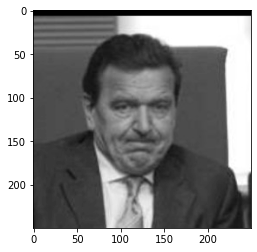

In [18]:
#X_length = len(X_train)
plt.imshow(X_train[0].reshape(img_size, img_size), cmap=plt.cm.gray)
plt.show()

In [ ]:
'''
from keras.preprocessing.image import ImageDataGenerator
NUMBER_TO_AUGMENT = 5
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest')

x_tas, y_tas = [] , []
for i in range(X_train.shape[0]):
  num_aug = 0
  x = X_train[i] # shape = (1, 250, 250)
  x = x.reshape((1,) + x.shape) # shape = (1,1,250,250)
  for x_aug in datagen.flow(x, batch_size=1, save_to_dir='preview_data_aug', save_prefix='dataset4', save_format='png'):
    if num_aug >= NUMBER_TO_AUGMENT:
      break
    x_tas.append(x_aug[0])
    num_aug += 1
'''


In [19]:


# model definition

shape = (img_size, img_size, 1)
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", padding='same', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(labelNo, activation='sigmoid'))


model.compile(loss= 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1)



In [20]:
X_train.shape[1:]

(250, 250, 1)

In [21]:
train_y = np.asarray(y)
print(X_train.shape)
print(train_y.shape)

(100, 250, 250, 1)
(100,)


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 250, 250, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 125, 125, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 250000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32000128  
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [23]:
#fit the dataget
#datagen.fit(X_train)
# train
#history = model.fit_generator(datagen.flow(X_train, train_y,batch_size=32), steps_per_epoch=1,epochs=50, verbose=1)
model_hist= model.fit(X_train, train_y, batch_size = 10, epochs=20,validation_split=0.1)

Epoch 1/20
9/9 [==============================] - 4s 378ms/step - loss: 8.7518 - accuracy: 0.1362 - val_loss: 2.8114 - val_accuracy: 0.1000
Epoch 2/20
9/9 [==============================] - 3s 358ms/step - loss: 3.1755 - accuracy: 0.1231 - val_loss: 2.3281 - val_accuracy: 0.2000
Epoch 3/20
9/9 [==============================] - 3s 356ms/step - loss: 2.2844 - accuracy: 0.1326 - val_loss: 2.3139 - val_accuracy: 0.1000
Epoch 4/20
9/9 [==============================] - 3s 353ms/step - loss: 2.1777 - accuracy: 0.2501 - val_loss: 2.5209 - val_accuracy: 0.1000
Epoch 5/20
9/9 [==============================] - 3s 355ms/step - loss: 1.8244 - accuracy: 0.4632 - val_loss: 2.4092 - val_accuracy: 0.0000e+00
Epoch 6/20
9/9 [==============================] - 3s 363ms/step - loss: 1.4916 - accuracy: 0.4935 - val_loss: 2.8554 - val_accuracy: 0.1000
Epoch 7/20
9/9 [==============================] - 3s 356ms/step - loss: 1.1396 - accuracy: 0.5494 - val_loss: 2.6559 - val_accuracy: 0.0000e+00
Epoch 8/20
9

In [24]:
NB_EPOCHS = 20
m = []
for i in range(NB_EPOCHS):
  m.append(i)

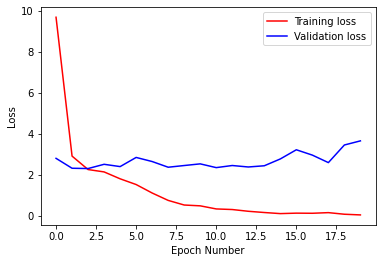

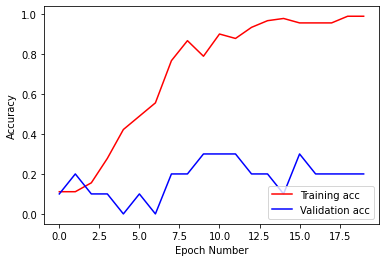

In [25]:

loss_trace = model_hist.history['loss']
val_loss_trace = model_hist.history['val_loss']
plt.plot(m,loss_trace, c='r')
plt.plot(m,val_loss_trace, c='b')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()


accuracy_trace = model_hist.history['accuracy']
val_accuracy_trace = model_hist.history['val_accuracy']
plt.plot(m,accuracy_trace, c='r')
plt.plot(m,val_accuracy_trace, c='b')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.legend(['Training acc', 'Validation acc'], loc='lower right')
plt.show()


In [26]:
pathModel = 'CNNSave/modelWith4_1Class_dataset4.json'
pathWeight = 'CNNSave/weightWith4_1Class_dataset4.h5'



model_json = model.to_json()

with open(pathModel, "w") as json_file:
    json_file.write(model_json)

model.save_weights(pathWeight)
print("Saved model to disk")

Saved model to disk
